In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

#setups
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
# read data in
columns_to_keep = ['TUCASEID','TEAGE','TELFS','TESEX','TESPEMPNOT','TRCHILDNUM','TRDPFTPT','TRERNWA','TUYEAR','TUDIARYDAY', 'TEHRUSLT']
summ_demo_iter = pd.read_csv('atussum_0321.csv', iterator= True, chunksize=10000, usecols=columns_to_keep)
summ_list = []
for summ_temp in summ_demo_iter:
    summ_temp = summ_temp.rename(columns={'TUCASEID':'case_id',
                                          'TEAGE':'age',
                                          'TELFS':'employed',
                                          'TESEX':'gender',
                                          'TESPEMPNOT':'spouse_empl',
                                          'TRCHILDNUM':'num_child',
                                          'TRDPFTPT':'full_part_wrk',
                                          'TRERNWA':'weekly_earn',
                                          'TUYEAR':'year', 
                                          'TUDIARYDAY': 'day',
                                          'TEHRUSLT': 'weekly_work_hrs'})
    summ_list.append(summ_temp)
atus = pd.concat(summ_list)
gender_dict = {'1':'Male','2':'Female'}
spouse_dict = {'1':'Employed', '2':'Not employed'}
part_full_dict = {'1':'Full Time', '2':'Part Time'}
atus.shape

(228455, 11)

In [14]:
atus.head(10)

,case_id,age,employed,gender,spouse_empl,num_child,full_part_wrk,weekly_earn,day,weekly_work_hrs,year
0,20030100013280,60,2,1,2,0,2,66000,6,30,2003
1,20030100013344,41,1,2,1,2,2,20000,7,30,2003
2,20030100013352,26,2,2,2,0,2,20000,7,12,2003
3,20030100013848,36,4,2,1,2,-1,-1,5,-1,2003
4,20030100014165,51,1,1,2,2,1,-1,5,80,2003
5,20030100014169,32,2,2,1,1,1,57600,5,40,2003
6,20030100014209,44,1,2,1,1,1,-1,2,52,2003
7,20030100014427,21,1,2,-1,1,1,33250,3,40,2003
8,20030100014550,33,1,2,1,3,1,63000,7,40,2003
9,20030100014758,39,1,2,2,4,1,45000,5,40,2003


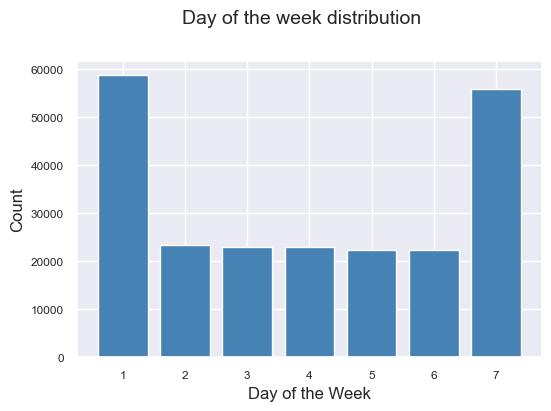

In [17]:
# 1d
## Categorical or binning continuous variables
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Day of the week distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Count") 
w_q = atus ['day'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue')

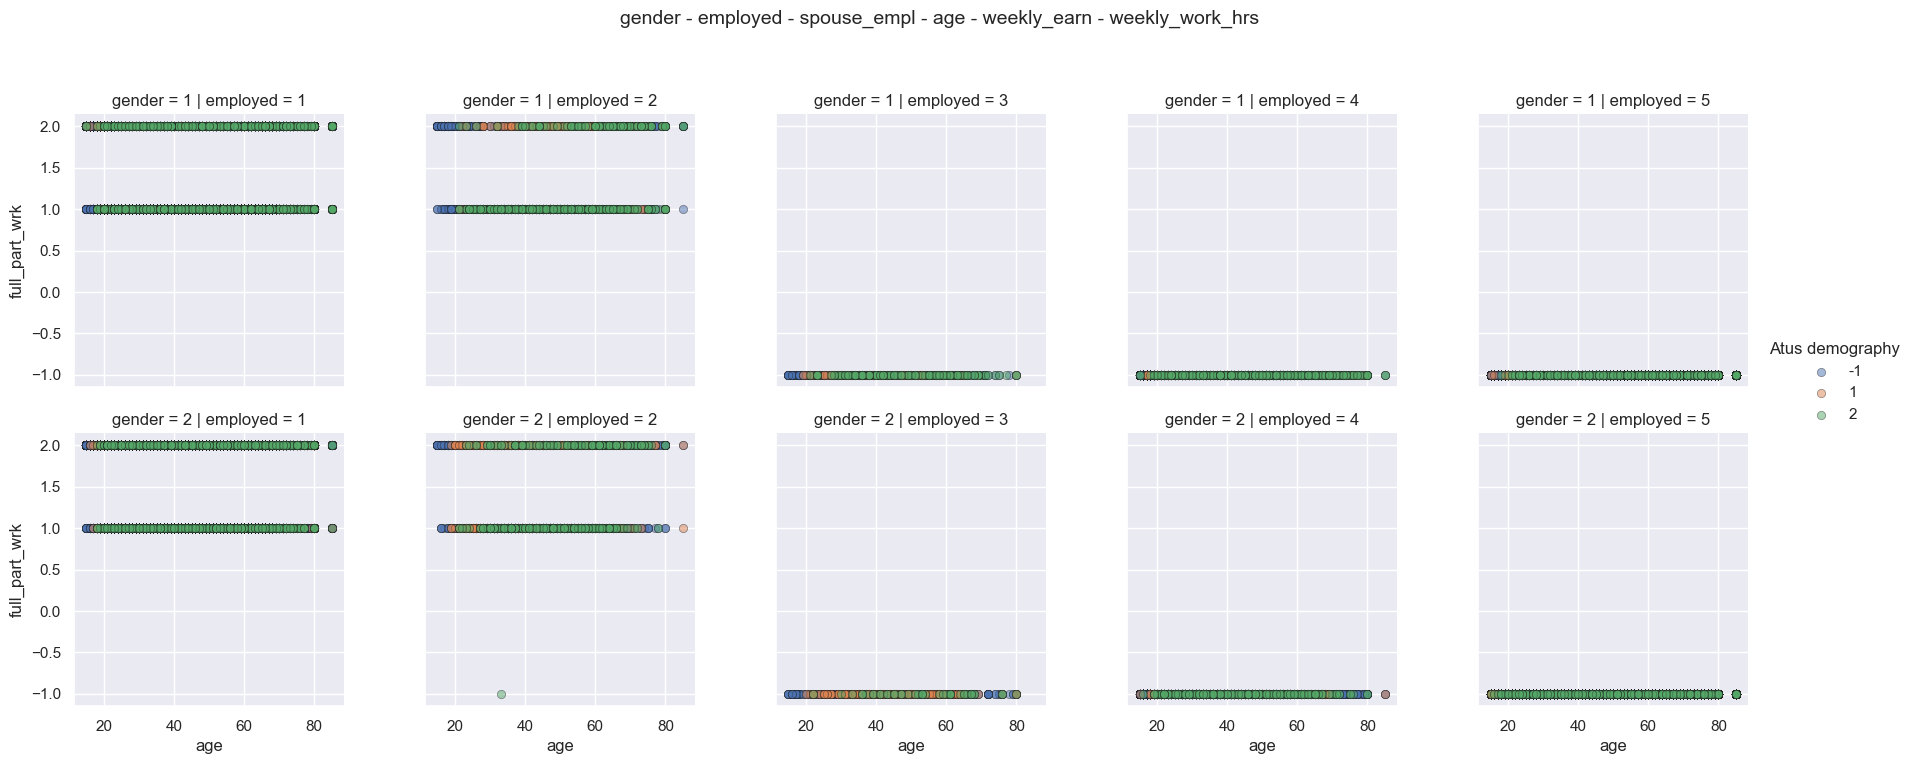

In [32]:
# 5d
## convert to categorical vars 
atus['case_id'] = atus['case_id'].astype('category')
atus['employed'] = atus['employed'].astype('category')
atus['gender'] = atus['gender'].astype('category')
atus['spouse_empl'] = atus['spouse_empl'].astype('category')
atus['day'] = atus['day'].astype('category')
atus['year'] = atus['year'].astype('category')
atus['full_part_wrk'] = atus['full_part_wrk'].astype('category')
atus.dtypes

g = sns.FacetGrid(atus, row='gender', col="employed", hue='spouse_empl')
g.map(plt.scatter,  "age", 'full_part_wrk', alpha=0.5, 
      edgecolor='k', linewidth=0.5)
fig = g.fig 
fig.set_size_inches(18, 8)
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('gender - employed - spouse_empl - age - weekly_earn - weekly_work_hrs', fontsize=14)
l = g.add_legend(title='Atus demography')